In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Loading 

In [5]:
df = pd.read_csv('../../datasets/predict-sales/sales_train.csv')
test_df = pd.read_csv('../../datasets/predict-sales/test.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              object
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [8]:
df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


# Visualizing Data 

Let's visualize some data from the test set:

In [99]:
def drawTimeSerie(sample,n):
    for i in range(n):
        shop_id = sample.iloc[i]['shop_id']
        item_id = sample.iloc[i]['item_id']
        id_df = df[(df['shop_id'] == shop_id) & (df['item_id'] == item_id)]
        id_df_grouped = id_df[['date_block_num','item_cnt_day']].groupby('date_block_num').sum().reset_index()
        plt.figure(figsize=[10,n*5])
        plt.subplot(n,1,i+1)
        plt.plot(id_df_grouped['date_block_num'], id_df_grouped['item_cnt_day'],'*-',)
        plt.title(str(shop_id) + ' - ' + str(item_id))

In [100]:
n_samples = 50
sample = test_df.sample(n=n_samples, axis=0)

/anaconda3/envs/dsbase/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


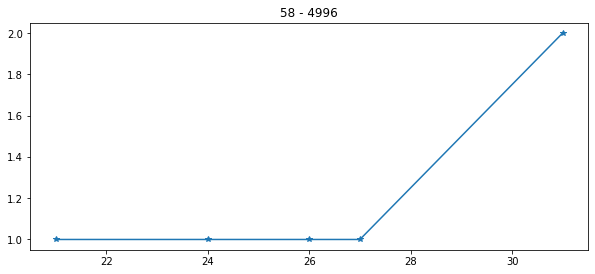

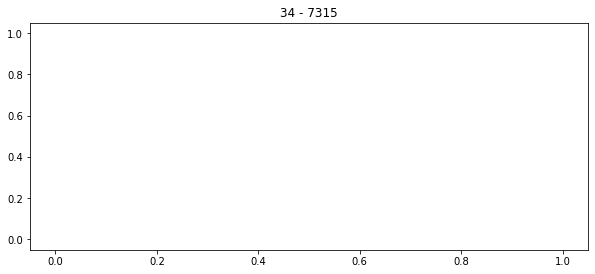

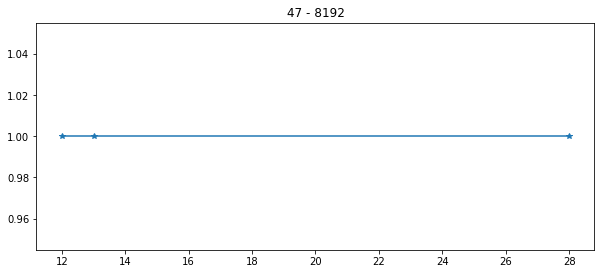

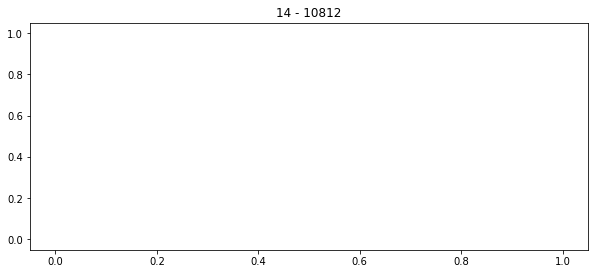

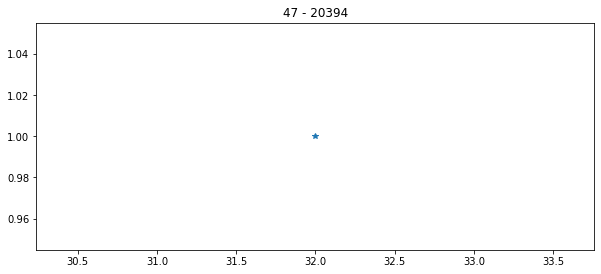

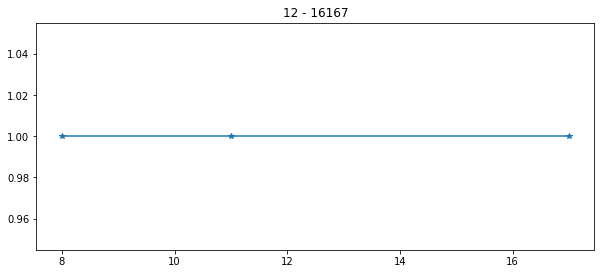

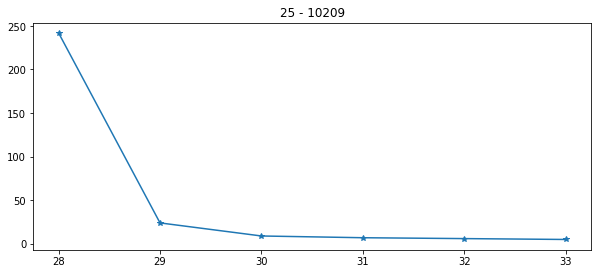

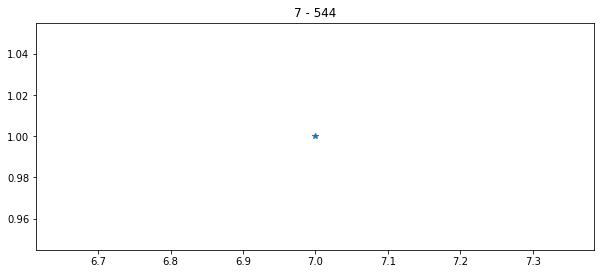

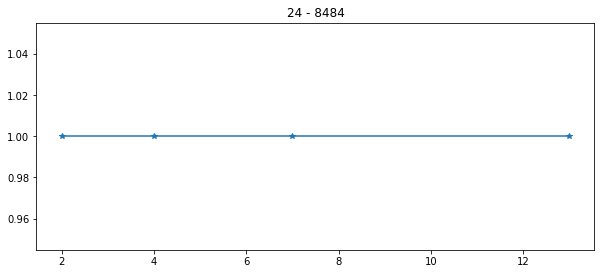

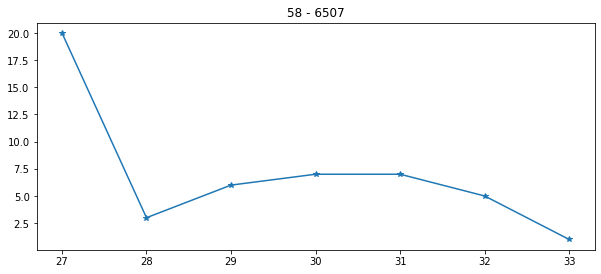

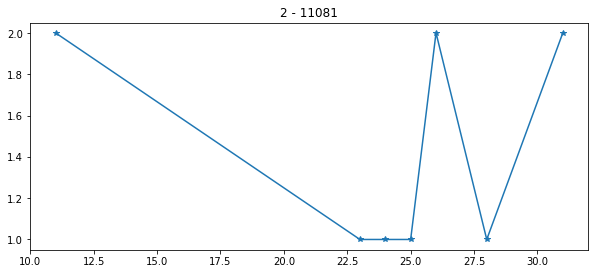

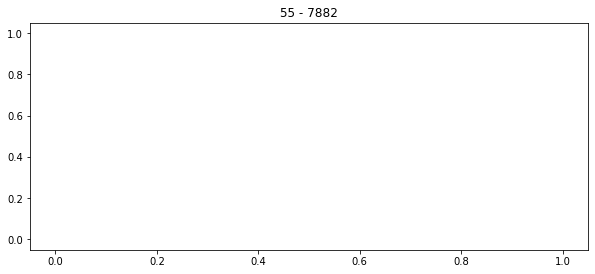

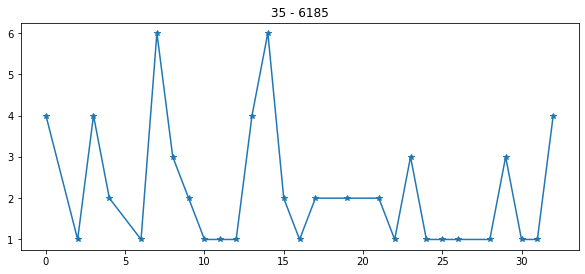

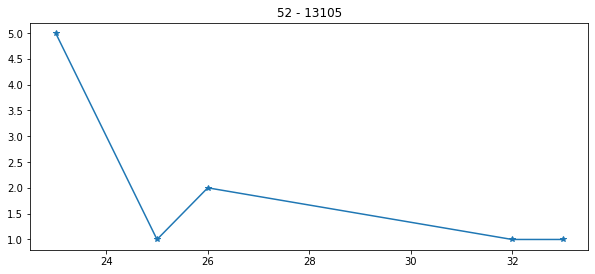

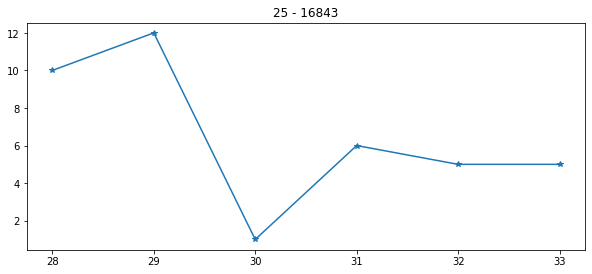

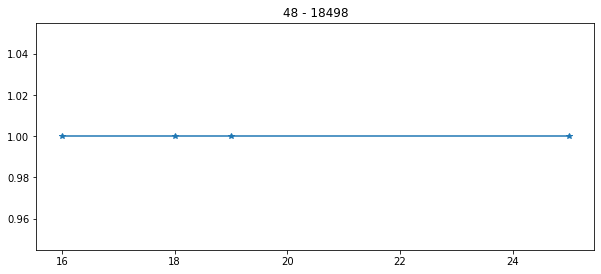

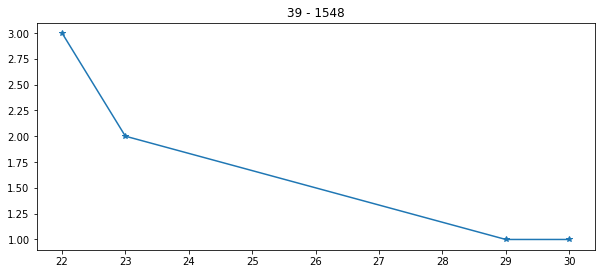

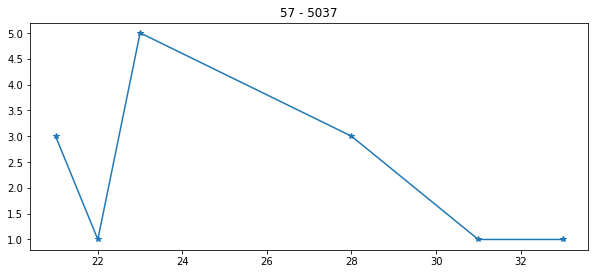

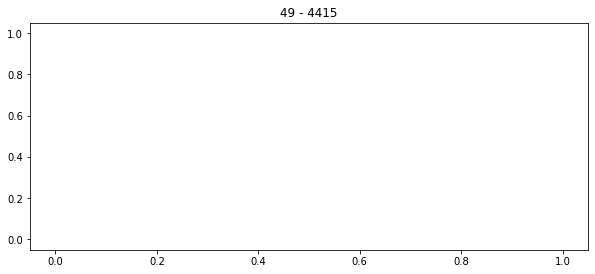

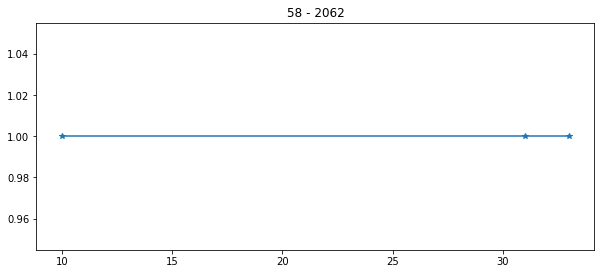

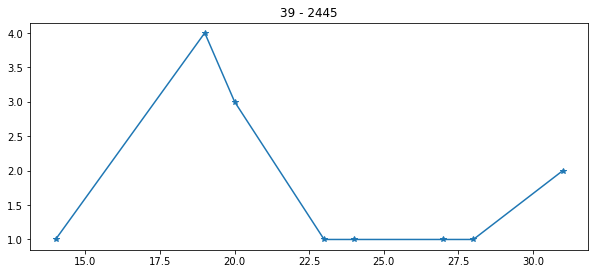

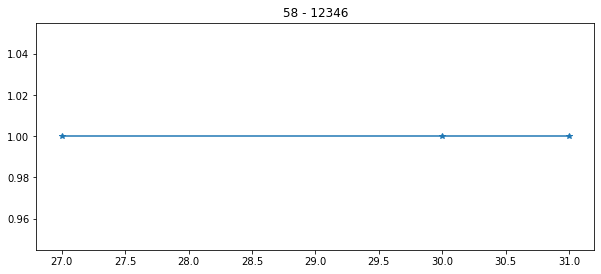

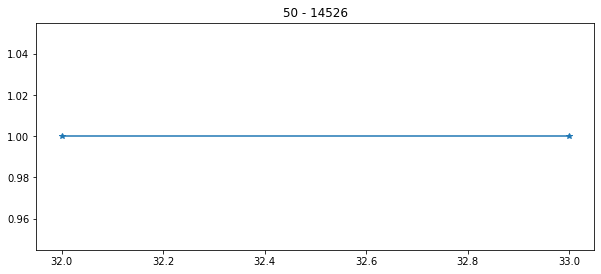

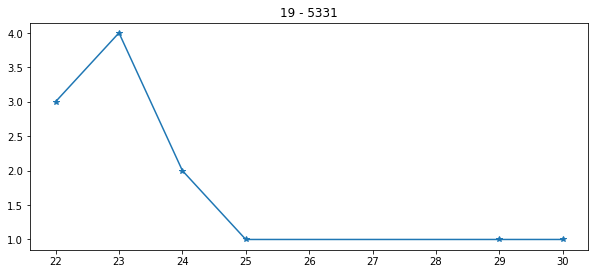

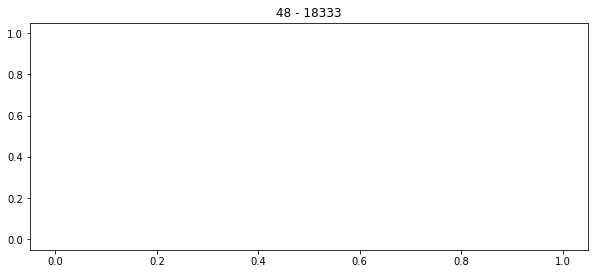

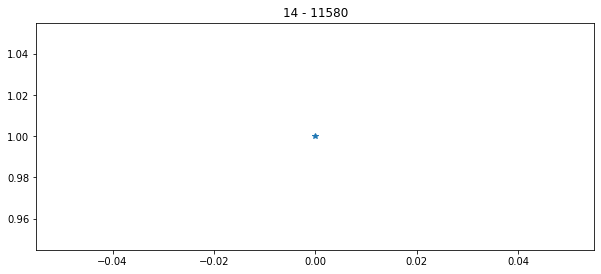

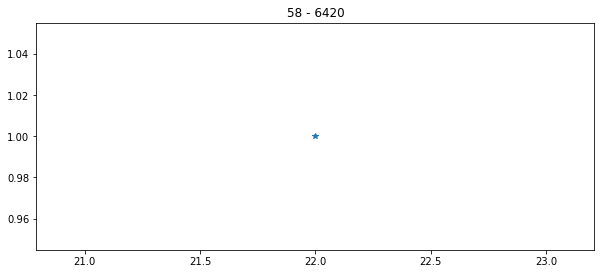

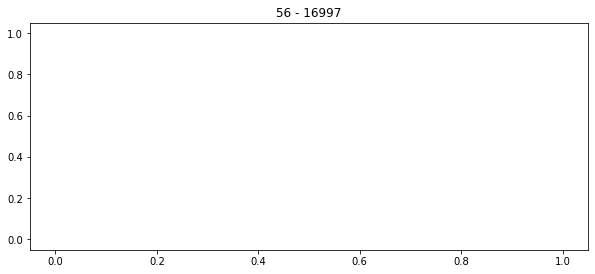

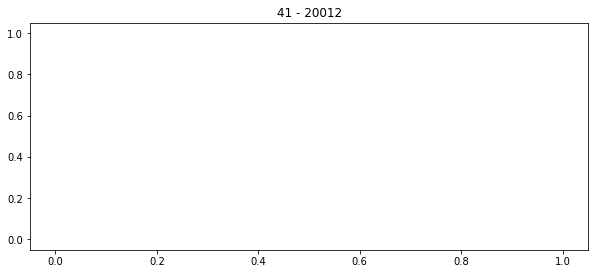

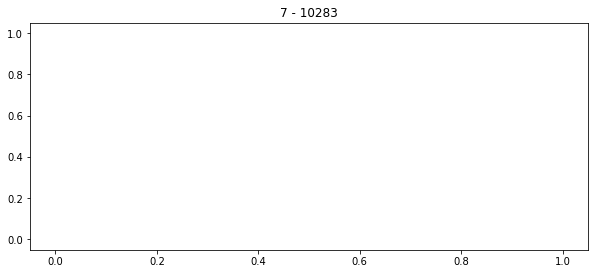

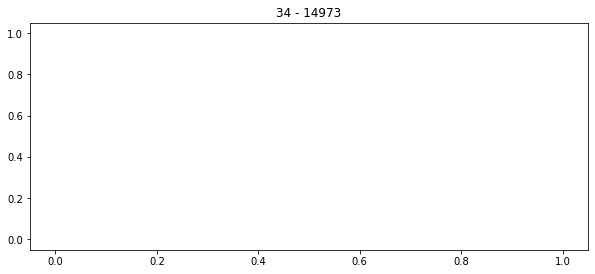

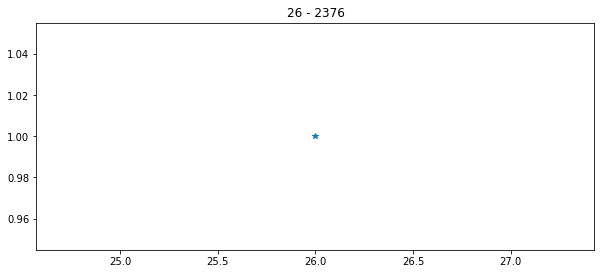

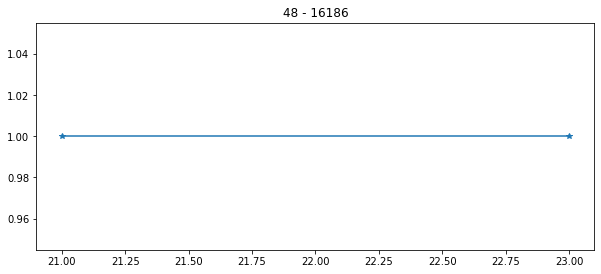

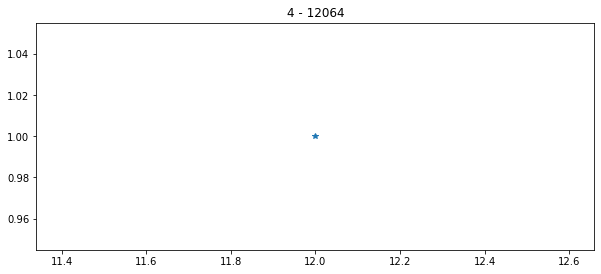

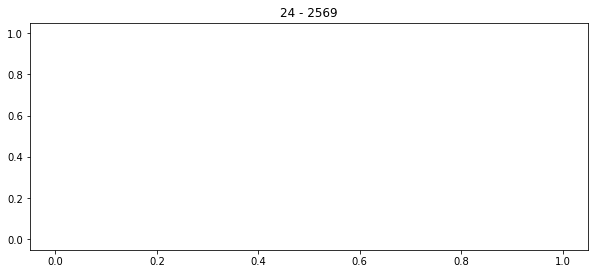

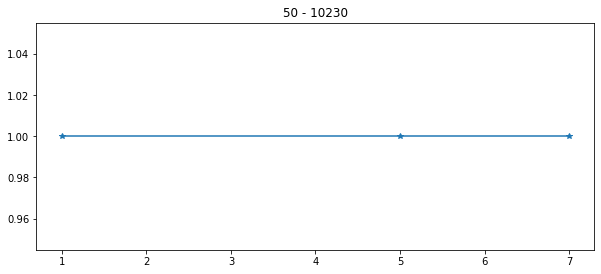

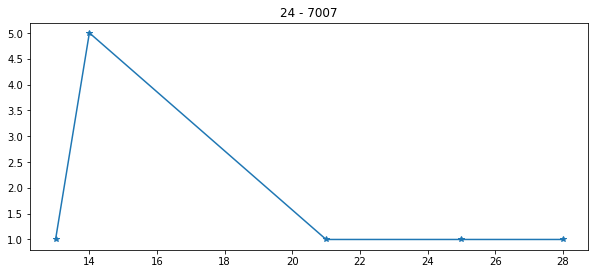

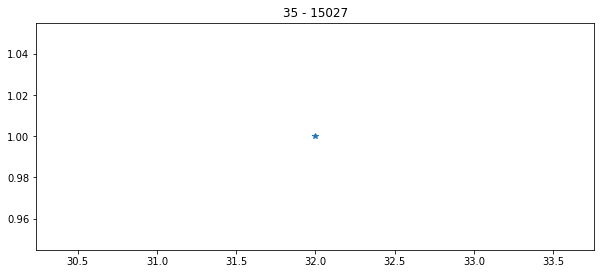

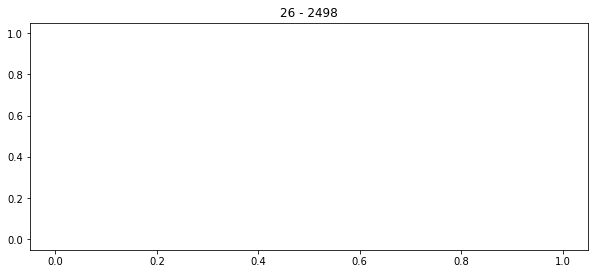

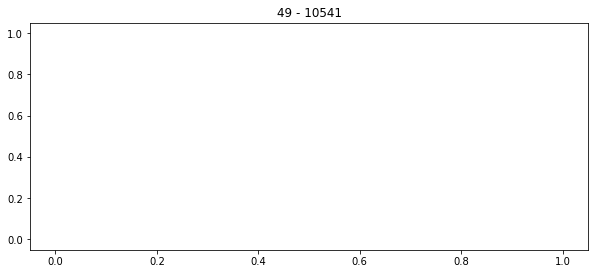

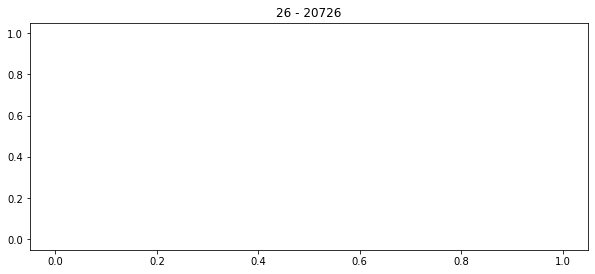

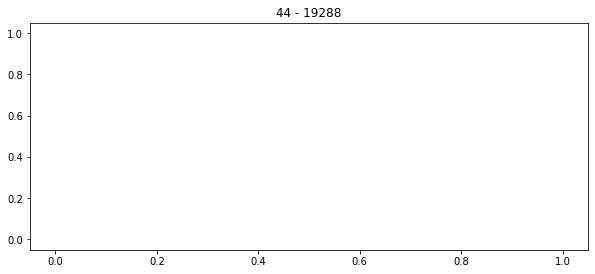

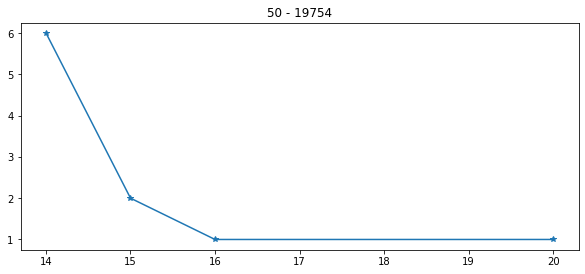

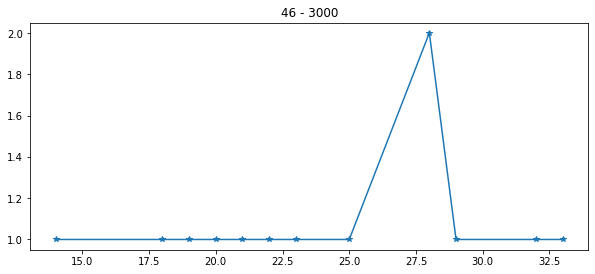

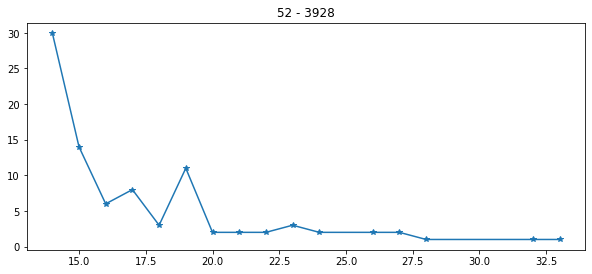

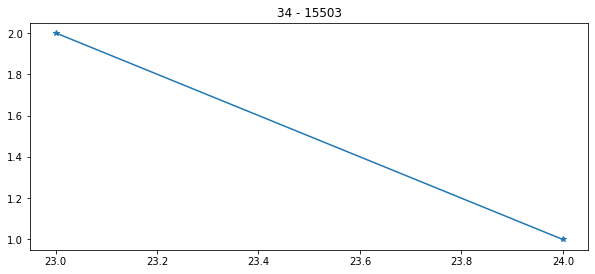

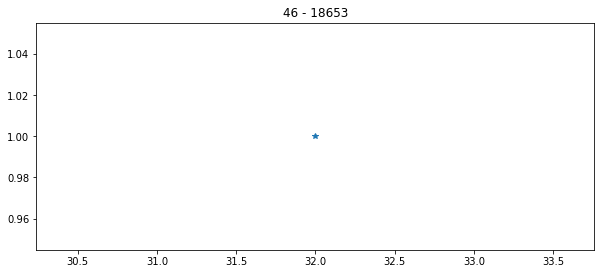

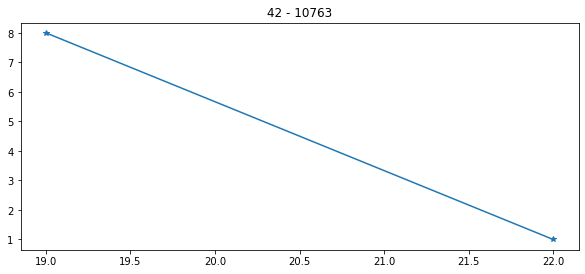

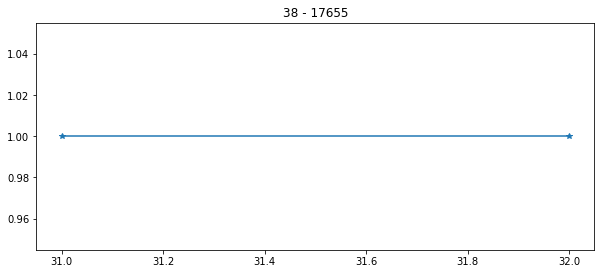

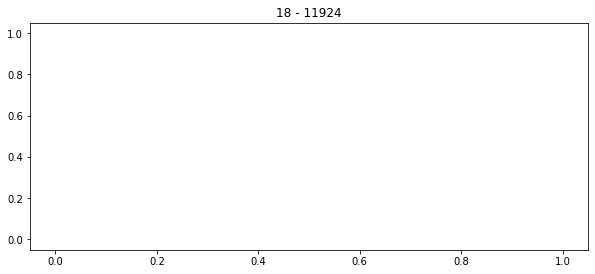

In [101]:
drawTimeSerie(sample,n_samples)